<a href="https://colab.research.google.com/github/mahyaalizadeh1995/pattern/blob/main/pattern_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import essential library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import zipfile
import tensorflow as tf
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.naive_bayes import BernoulliNB
import cv2
import random
from tensorflow.keras import layers
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import Xception
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from itertools import cycle
from sklearn.svm import SVC
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from skimage import io
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

In [ ]:
# downloading dataset
!gdown --id 17sF4FtqeQP4UMxwJ5P9ncTv1jnwhNYfT

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17sF4FtqeQP4UMxwJ5P9ncTv1jnwhNYfT
To: /content/archive.zip
100% 98.0M/98.0M [00:00<00:00, 212MB/s]


In [ ]:
# extract dataset to tmp folder
local_zip = '/content/archive.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# length of contents in dataset
print(len(os.listdir('/tmp/Dataset/Auto')))
print(len(os.listdir('/tmp/Dataset/Car')))
print(len(os.listdir('/tmp/Dataset/Motorcycle')))

442
442
442


In [ ]:
# make folder for trainig and testing set
os.mkdir('/tmp/multiclassification')
os.mkdir('/tmp/multiclassification/training')
os.mkdir('/tmp/multiclassification/testing')
try:
  classes = ['Auto','Car','Motorcycle']
  for class_name in classes:
    os.mkdir(os.path.join('/tmp/multiclassification/training',class_name))
    os.mkdir(os.path.join('/tmp/multiclassification/testing',class_name))
    print('created')
except:
  print('failed')

created
created
created


In [ ]:
# split dataset (70% training set , 30% test set)
def split_data(SOURCE, TRAINING, TESTING,SPLIT_SIZE):
  data =[]
  LENGTH = int(len(os.listdir(SOURCE)) * 0.7)
  for file_name in os.listdir(SOURCE):
    file_path = SOURCE + file_name

    if os.path.getsize(file_path) != 0.0:
      data.append(file_name)
  train_data = data[:LENGTH]
  test_data = data[LENGTH:]

  for i in train_data:
    copyfile(SOURCE + i , TRAINING + i)

  for i in test_data:
    copyfile(SOURCE + i, TESTING + i)



Auto_SOURCE_DIR =   "/tmp/Dataset/Auto/"
TRAINING_Auto_DIR = "/tmp/multiclassification/training/Auto/"
TESTING_Auto_DIR =  "/tmp/multiclassification/testing/Auto/"
Car_SOURCE_DIR =    '/tmp/Dataset/Car/'
TRAINING_Car_DIR =  "/tmp/multiclassification/training/Car/"
TESTING_Car_DIR =   "/tmp/multiclassification/testing/Car/"
Motorcycle_SOURCE_DIR = '/tmp/Dataset/Motorcycle/'
TRAINING_Motorcycle_DIR = "/tmp/multiclassification/training/Motorcycle/"
TESTING_Motorcycle_DIR = "/tmp/multiclassification/testing/Motorcycle/"

split_size = .7
split_data(Auto_SOURCE_DIR,TRAINING_Auto_DIR, TESTING_Auto_DIR, split_size)
split_data(Car_SOURCE_DIR, TRAINING_Car_DIR, TESTING_Car_DIR, split_size)
split_data(Motorcycle_SOURCE_DIR,TRAINING_Motorcycle_DIR, TESTING_Motorcycle_DIR, split_size)

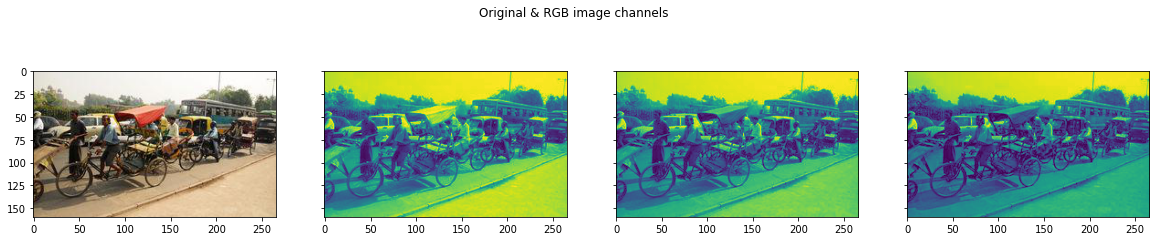

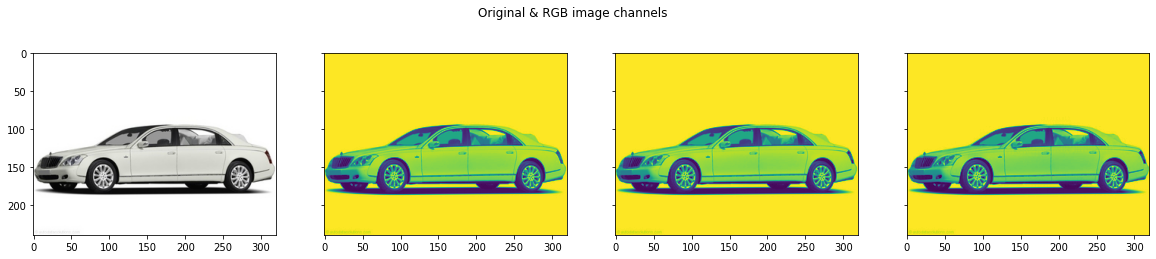

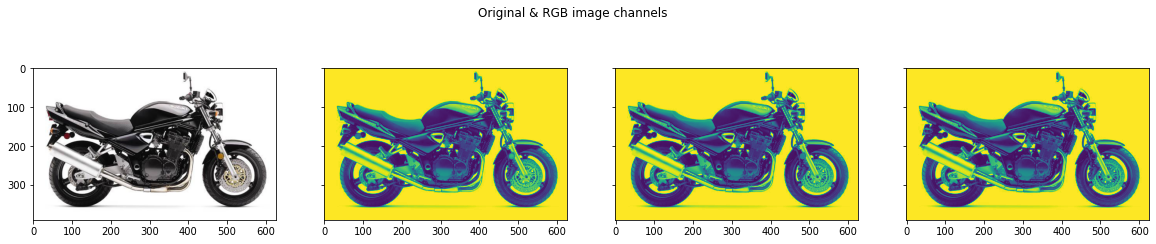

In [ ]:
# for Auto class
for img in os.listdir('/tmp/Dataset/Auto/'):
  path_img = os.path.join('/tmp/Dataset/Auto/',img)
  image = io.imread(path_img)
  i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
  i.set_figwidth(20)

  im1.imshow(image)  #Original image
  im2.imshow(image[:, : , 0]) #Red
  im3.imshow(image[:, : , 1]) #Green
  im4.imshow(image[:, : , 2]) #Blue
  i.suptitle('Original & RGB image channels')
  break

# for car class
for img in os.listdir('/tmp/Dataset/Car/'):
  path_img = os.path.join('/tmp/Dataset/Car/',img)
  image = io.imread(path_img)
  i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
  i.set_figwidth(20)

  im1.imshow(image)  #Original image
  im2.imshow(image[:, : , 0]) #Red
  im3.imshow(image[:, : , 1]) #Green
  im4.imshow(image[:, : , 2]) #Blue
  i.suptitle('Original & RGB image channels')
  break
# for motorcycle class
for img in os.listdir('/tmp/Dataset/Motorcycle/'):
  path_img = os.path.join('/tmp/Dataset/Motorcycle/',img)
  image = io.imread(path_img)
  i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
  i.set_figwidth(20)

  im1.imshow(image)  #Original image
  im2.imshow(image[:, : , 0]) #Red
  im3.imshow(image[:, : , 1]) #Green
  im4.imshow(image[:, : , 2]) #Blue
  i.suptitle('Original & RGB image channels')
  break

In [ ]:
# path_list = [
#       "/tmp/multiclassification/training/Auto/",
#       "/tmp/multiclassification/testing/Auto/",
#       "/tmp/multiclassification/training/Car/",
#       "/tmp/multiclassification/testing/Car/",
#       "/tmp/multiclassification/training/Motorcycle/",
#       "/tmp/multiclassification/testing/Motorcycle/", ]
# for path in path_list:
#   for img in os.listdir(path):
#    path_img = os.path.join(path,img)
#    image = io.imread(path_img)
#    norm_image = (image - np.min(image)) / (np.max(image) - np.min(image))
#    data = img_to_array(image)
#    samples = expand_dims(image, 0)


In [ ]:
# preprocessing
# data augmentation

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range = 40,
                                   width_shift_range =0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip= True,
                                   featurewise_center =True,
                                   featurewise_std_normalization = True)
train_datagen.fit(X_train)
train_generator = train_datagen.flow_from_directory(directory='/tmp/multiclassification/training/',
                                             target_size=(150,150),
                                             color_mode = 'rgb',
                                             class_mode='categorical',
                                             batch_size=100,
                                             shuffle = True,
                                             seed =42)

validation_datagen = ImageDataGenerator(rescale=1/255.,
                                       featurewise_center =True,
                                       featurewise_std_normalization = True)

validation_datagen.fit(X_valid)
validation_generator = validation_datagen.flow_from_directory(directory='/tmp/multiclassification/testing/',
                                             target_size=(150,150),
                                             color_mode='rgb',
                                             class_mode='categorical',
                                             batch_size=100,
                                             shuffle = True,
                                             seed =42)
# training set and validation set
X_train, y_train = next(train_generator)
X_valid , y_valid = next(validation_generator)

Found 927 images belonging to 3 classes.
Found 399 images belonging to 3 classes.


In [ ]:
y_train[20]

array([0., 1., 0.], dtype=float32)

In [ ]:
# change the form of labels from one-hot encoding into numbers
# training set
train_labels = []
for item in y_train:
  if item[0] == 1.0:
    train_labels.append(1)
  if item[1] == 1.0:
    train_labels.append(2)
  if item[2] == 1.0:
    train_labels.append(3)

# validation set
valid_labels = []
for item in y_valid:
  if item[0] == 1.0:
    valid_labels.append(1)
  if item[1] == 1.0:
    valid_labels.append(2)
  if item[2] == 1.0:
    valid_labels.append(3)

In [ ]:
# length of training and testing set for each categories
print(len(os.listdir("/tmp/multiclassification/training/Auto/")))
print(len(os.listdir("/tmp/multiclassification/testing/Auto/")))
print(len(os.listdir("/tmp/multiclassification/training/Car/")))
print(len(os.listdir("/tmp/multiclassification/testing/Car/")))
print(len(os.listdir("/tmp/multiclassification/training/Motorcycle/")))
print(len(os.listdir("/tmp/multiclassification/testing/Motorcycle/")))

309
133
309
133
309
133


In [ ]:
#feature extracting from cnn model
model = Sequential()
model.add(Xception(weights = 'imagenet', input_shape = (150,150,3),include_top=False))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512,activation = 'relu', name ='fc1'))
model.add(layers.Dense(512,activation = 'relu', name ='fc2'))
model.add(layers.Dense(512,activation = 'relu', name ='fc3'))
model.add(layers.Dense(256,activation = 'relu', name ='fc4'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(3,activation='softmax',name = 'fc5'))

model.layers[0].trainable=False
model.compile(loss= 'categorical_crossentropy',optimizer= 'adam',metrics = ['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 fc1 (Dense)                 (None, 512)               1049088   
                                                                 
 fc2 (Dense)                 (None, 512)               262656    
                                                                 
 fc3 (Dense)                 (None, 512)               262656    
                                                                 
 fc4 (Dense)                 (None, 256)               131328    
                                                      

In [ ]:
model.fit(train_generator,
          epochs=10,
          verbose = 1,
          validation_data = validation_generator)

Epoch 1/10
10/10 [==============================] - 112s 11s/step - loss: 27.4367 - accuracy: 0.3635 - val_loss: 5.8191 - val_accuracy: 0.3759
Epoch 2/10
10/10 [==============================] - 110s 11s/step - loss: 3.4120 - accuracy: 0.4628 - val_loss: 1.1074 - val_accuracy: 0.5414
Epoch 3/10
10/10 [==============================] - 118s 12s/step - loss: 1.3658 - accuracy: 0.5254 - val_loss: 0.9203 - val_accuracy: 0.6216
Epoch 4/10
10/10 [==============================] - 120s 12s/step - loss: 0.9496 - accuracy: 0.5750 - val_loss: 0.7447 - val_accuracy: 0.6617
Epoch 5/10
10/10 [==============================] - 110s 11s/step - loss: 0.8961 - accuracy: 0.6160 - val_loss: 0.8650 - val_accuracy: 0.6266
Epoch 6/10
10/10 [==============================] - 108s 11s/step - loss: 0.8031 - accuracy: 0.6559 - val_loss: 0.6900 - val_accuracy: 0.6867
Epoch 7/10
10/10 [==============================] - 110s 11s/step - loss: 0.7889 - accuracy: 0.6419 - val_loss: 0.8387 - val_accuracy: 0.6291
Epoch

In [ ]:
# removing last layer from network
model.pop()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 fc1 (Dense)                 (None, 512)               1049088   
                                                                 
 fc2 (Dense)                 (None, 512)               262656    
                                                                 
 fc3 (Dense)                 (None, 512)               262656    
                                                                 
 fc4 (Dense)                 (None, 256)               131328    
                                                      

In [ ]:
#feature extracting
feature_map = model(X_train)


In [ ]:
# feature extracting for validation set
feature_map_valid = model(X_valid)

In [ ]:
# add svm classifier to model
clf_svm = OneVsRestClassifier(LinearSVC(random_state= 42))
y_score_svm = clf_svm.fit(feature_map,y_train).decision_function(feature_map_valid)

In [ ]:
lw = 2
n_classes =3
# Plot all ROC curves
def draw_roc_curve(y_valid,y_pred,lw,n_classes,classifier):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  plt.figure()

  colors = cycle(["green", "yellow", "blue"])
  for i, color in zip(range(n_classes), colors):
      plt.plot(
          fpr[i],
          tpr[i],
          color=color,
          lw=lw,
          label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
      )

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver operating characteristic for {} classifier".format(classifier))
  plt.legend(loc="lower right")
  plt.show()

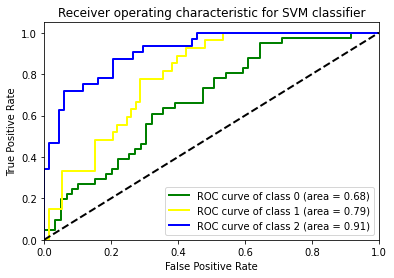

In [ ]:
#roc curve for svm classification
draw_roc_curve(y_valid,y_score_svm,lw,n_classes,'SVM')

In [ ]:
 def draw_confusion_matrix(model,x_valid,y_valid):
  y_pred = model.predict(x_valid)
  confusion_matrix_for_model= confusion_matrix(y_valid.argmax(axis=1),y_pred.argmax(axis=1))
  cm_df = pd.DataFrame(confusion_matrix_for_model,
                      index = ['Auto','Car','Motorcycle'],
                      columns = ['Auto','Car','Motorcycle'])
  #Plotting the confusion matrix
  plt.figure(figsize=(5,4))
  sns.heatmap(cm_df, annot=True)
  plt.title('Confusion Matrix')
  plt.ylabel('Actal Values')
  plt.xlabel('Predicted Values')
  plt.show()

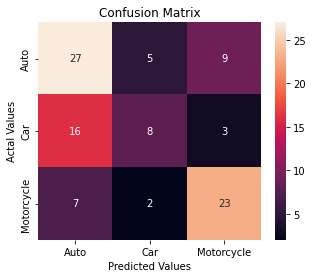

In [ ]:
#confusion matrix for svm
draw_confusion_matrix(clf_svm,feature_map_valid,y_valid)

In [ ]:
# Gaussian Naive Bayes
clf_naive_bayes = OneVsRestClassifier(BernoulliNB())
clf_naive_bayes.fit(feature_map,y_valid)
y_pred_naive = clf_naive_bayes.predict_proba(feature_map_valid)

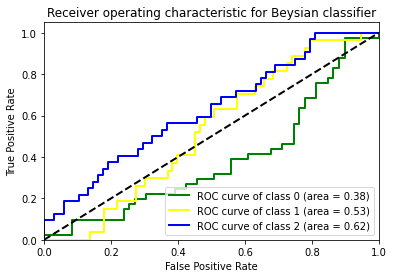

In [ ]:
draw_roc_curve(y_valid,y_pred_naive,lw,n_classes,'Beysian')

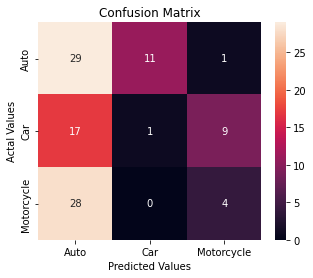

In [ ]:
# confusion matrix for Beysian
draw_confusion_matrix(clf_naive_bayes,feature_map_valid,y_valid)

In [ ]:
# random forest model
model_random_forest = OneVsRestClassifier(RandomForestClassifier())
model_random_forest.fit(feature_map,y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [ ]:
y_pred_random_forest = model_random_forest.predict_proba(feature_map_valid)

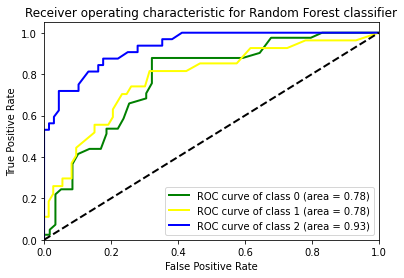

In [ ]:
draw_roc_curve(y_valid,y_pred_random_forest,lw,n_classes,'Random Forest')

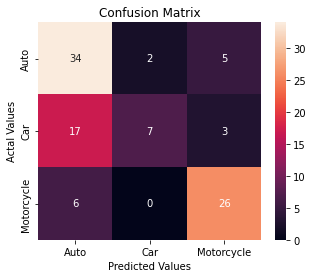

In [ ]:
# confusion matrix for random forest
draw_confusion_matrix(model_random_forest,feature_map_valid,y_valid)

In [ ]:
# kNN classifier
model_KNN = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=7))
model_KNN.fit(feature_map,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier(n_neighbors=7))

In [ ]:
y_pred_KNN = model_KNN.predict_proba(feature_map_valid)

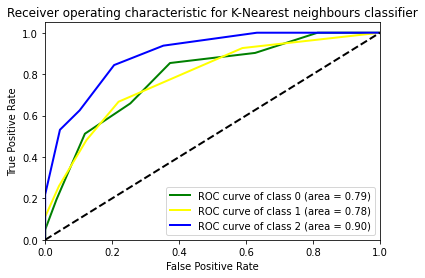

In [ ]:
draw_roc_curve(y_valid,y_pred_KNN,lw,n_classes,'K-Nearest neighbours')

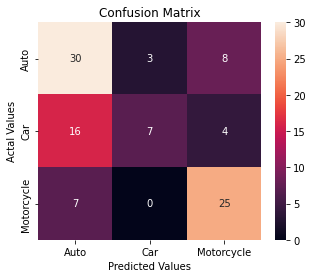

In [ ]:
#confusion matrix for KNN
draw_confusion_matrix(model_KNN,feature_map_valid,y_valid)

In [ ]:
model_tree = OneVsRestClassifier(DecisionTreeClassifier())
model_tree.fit(feature_map,y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier())

In [ ]:
y_pred_tree = model_tree.predict_proba(feature_map_valid)

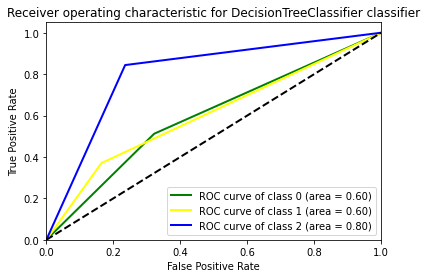

In [ ]:
draw_roc_curve(y_valid,y_pred_tree,lw,n_classes,'DecisionTreeClassifier')

In [ ]:
#confusion matrix for Decision tree
draw_confusion_matrix(model_tree,feature_map_valid,y_valid)